# Silver per m2 Calculations

This journal documents the calculations and assumptions for the silver baseline file used in the calculator.

In [1]:
import numpy as np
import pandas as pd
import os,sys
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (12, 8)

density_Ag = 10.49 #g/cm3, source Wikipedia

### Pre-Journal Calculations

From the ITRPVs, we have grams of Ag per cell from 2009 through 2019, with projections through 2030. Data for silver per cell for 4 different types of cell were extracted from ITRPV graphs with "webplotdigitizer" then rounded to ~2 significant figures. The 4 types of cell noted in ITRPV 2019 and 2020 are Monofacial p-type, Bifacial p-type, HJT n-type, and n-type. Some mathmatical assumptions:

1) n-type cells account for only 5% of the world market share and have for the last decade. While the amount of silver in the two different n-type cells is noteably different, because their marketshare is so small, these two n-type cell silver quantities were averaged together.

2) The difference in silver per cell between bifacial and monofacial cells is not significant, and were therefore averaged together.

Therefore the process for determining the average silver per cell across the different technologies was:

        average silver per cell = 0.95*(average of monofacial and bifacial p-type) + 0.05*(average of n-type)
        
This math was completed in the google spreadsheet of raw data
<https://docs.google.com/spreadsheets/d/1WV54lNAdA2uP6a0g5wMOOE9bu8nbwvnQDgLj3GuGojE/edit?usp=sharing>
then copied to a csv and is uploaded here.

In [2]:
#read in the csv of 2009 through 2030 data for silver per cell.
cwd = os.getcwd() #grabs current working directory
skipcols = ['Source']
itrpv_ag_gpc = pd.read_csv(cwd+"/../../PV_ICE/baselines/SupportingMaterial/ag_g_per_cell.csv", 
                           index_col='Year', usecols=lambda x: x not in skipcols)

Text(0, 0.5, 'Silver, grams/cell')

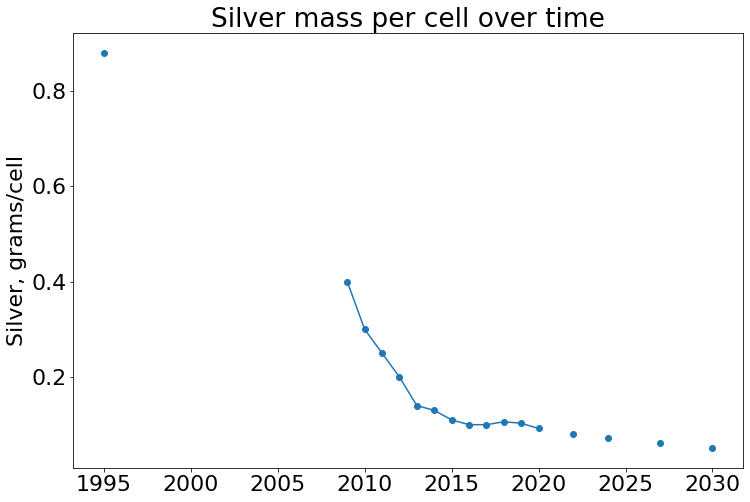

In [3]:
#plot the raw data
plt.plot(itrpv_ag_gpc, marker="o")
plt.title("Silver mass per cell over time")
plt.ylabel("Silver, grams/cell")

Based on looking at the plot of original data, it doesn't seem crazy to linearly interpolate for missing data

Text(0, 0.5, 'Silver, grams/cell')

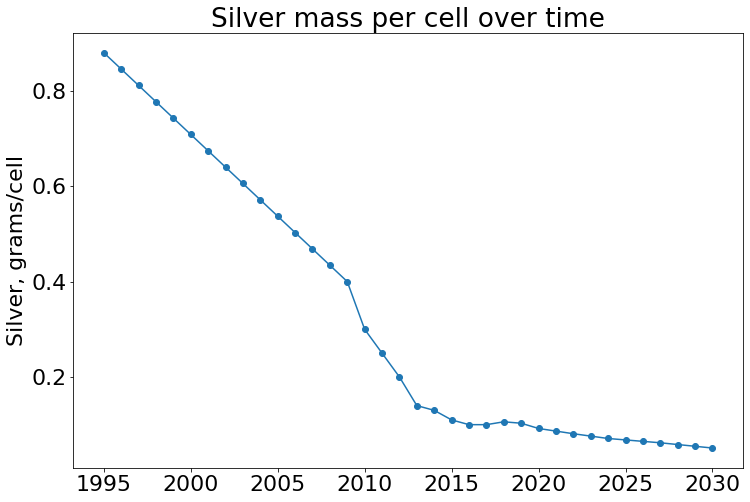

In [4]:
ag_gpc = itrpv_ag_gpc.interpolate()
plt.plot(ag_gpc, marker="o")
plt.title("Silver mass per cell over time")
plt.ylabel("Silver, grams/cell")

## Convert to a per module area basis (not per cell)

In [5]:
#import cell per m2 from the silicon baseline
cpm2 = pd.read_csv(cwd+"/../../PV_ICE/baselines/SupportingMaterial/output_cell_per_m2.csv",
                   index_col='Year', usecols=lambda x: x not in skipcols)
#print(cpm2)

Text(0, 0.5, 'Silver, grams/module m2')

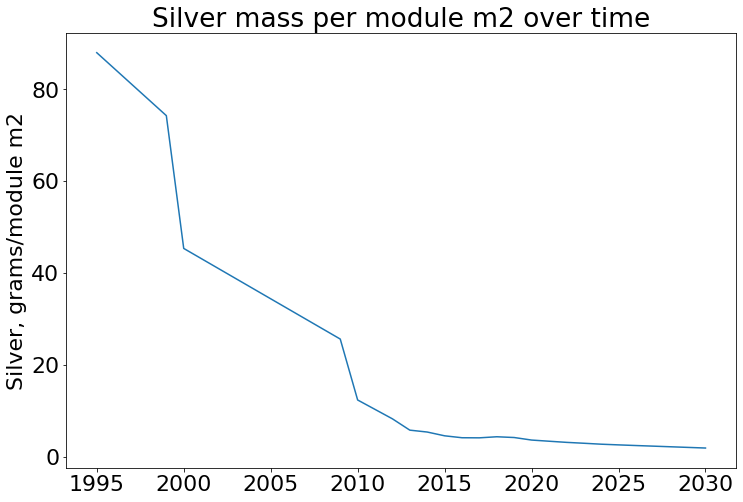

In [6]:
#convert silver per cell to silver per m^2 of module, based on output from silicon baseline
ag_gpc.columns = cpm2.columns = ['ag_g_per_m2'] #rename to a common name
ag_gpm2 = ag_gpc.mul(cpm2, 'columns') #multiply
plt.plot(ag_gpm2)
plt.title("Silver mass per module m2 over time")
plt.ylabel("Silver, grams/module m2")

### Extend projection through 2050
It appears that the silver per cell is expected to level out by 2025 or so. We will extend 2030 values through 2050 as a "lower limit" or minimal further improvement.

Text(0, 0.5, 'Silver, grams/module m2')

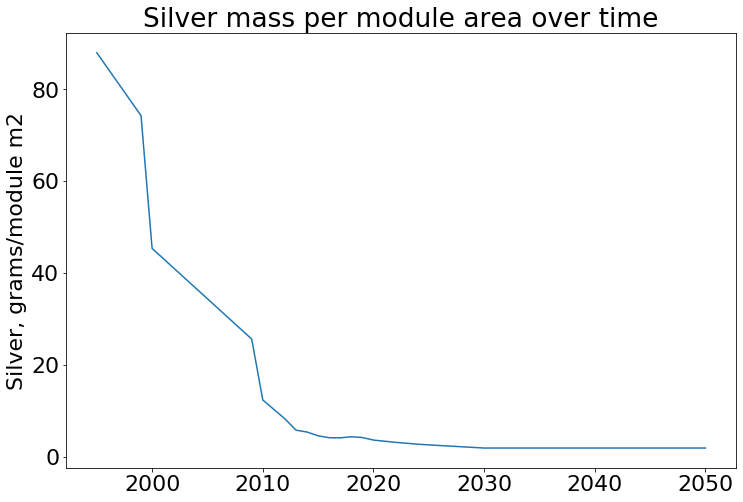

In [9]:
#create an empty df as a place holder
yrs = pd.Series(index=range(2031,2050), dtype='float64')
tempdf = pd.DataFrame(yrs, columns=['ag_g_per_m2'])
fulldf = pd.concat([ag_gpm2,tempdf]) #attach it to rest of df

#set the 2050 value to the same as 2030
fulldf.loc[2050] = fulldf.loc[2030]
#interpolate for missing values
ag_gpm2_full = fulldf.interpolate()
#print(ag_gpm2_full)

#plot
plt.plot(ag_gpm2_full)
plt.title("Silver mass per module area over time")
plt.ylabel("Silver, grams/module m2")

In [8]:
#print out to csv
ag_gpm2_full.to_csv(cwd+'/../../PV_ICE/baselines/SupportingMaterial/output_ag_g_per_m2.csv', index=True)